##Data Augmentation

In [2]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= '0.20'

import numpy as np
import pandas as pd
import os

np.random.seed(42)

#Plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#Fig save path
PROJECT_ROOT_DIR = '.'
CHAPTER_ID = 'classification'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, 'images', CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
  path = os.path.join(IMAGES_PATH, fig_id+'.'+fig_extension)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution) 

In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=True)

In [4]:
X, y = mnist['data'], mnist['target']

In [ ]:
X.shape

(70000, 784)

In [5]:
#Test and train data split
y = y.astype(np.uint8)

X_train, X_test, y_train, y_test = X[:20000], X[68000:], y[:20000], y[68000:]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=3, n_jobs=-1, p=3)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=3,
                     weights='distance')

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.98

In [9]:
#Shift the images in all directions

from scipy.ndimage.interpolation import shift

def shift_image(image, dx, dy):
  image = image.reshape(28, 28)
  shft_img = shift(image, [dx, dy], cval=0, mode='constant')
  return shft_img.reshape([-1])

In [11]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

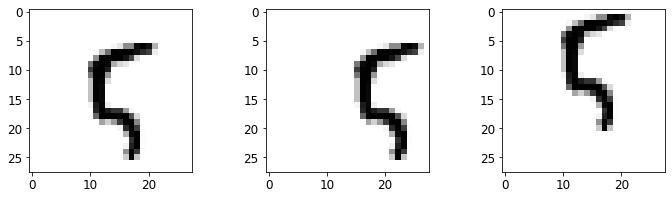

In [ ]:
image = X_train[100]
shft_img_down = shift_image(image, 0, 5)
shft_img_left = shift_image(image, -5, 0)

plt.figure(figsize=(12, 3))

plt.subplot(131)
plt.imshow(image.reshape(28, 28), interpolation='nearest', cmap='Greys')

plt.subplot(132)
plt.imshow(shft_img_down.reshape(28, 28), interpolation='nearest', cmap='Greys')

plt.subplot(133)
plt.imshow(shft_img_left.reshape(28, 28), interpolation='nearest', cmap='Greys')

plt.show()

In [ ]:
X_train_aug = [img for img in X_train]
y_train_aug = [img for img in y_train]

for dx, dy in [(0, 1)]: #, (0, -1), (1, 0), (-1, 0)):
  for image, label in zip(X_train_aug, y_train_aug):
    X_train_aug.append(shift_image(image, dx, dy))
    y_train_aug.append(label)

X_train_aug = np.array(X_train_aug)
y_train_aug = np.array(y_train_aug)

In [1]:
shuffle_id = np.random.permutation(len(X_train_aug))

X_train_aug = X_train_aug[shuffle_id]
y_train_aug = y_train_aug[shuffle_id]

NameError: ignored

In [ ]:
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=3, n_jobs=-1, p=3)
knn_clf.fit(X_train_aug, y_train_aug)

In [ ]:
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)